In [1]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os
import textwrap

In [2]:
home_dir=os.environ['HOME']
HOME=Path(home_dir)

In [3]:
rose='u-cy368'
ANCILLARY_DIR= HOME / 'cylc-run' / rose / 'share/data/ancils/aus2200'

In [4]:
# Resolution directoryes

ERA_DIR = ANCILLARY_DIR / 'era5/'
D0198_DIR = ANCILLARY_DIR / 'd0198/'

In [5]:
# We need to import ants to read in UM file formats
import ants

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/esmf.py:26: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/_ugrid.py:19: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/experimental/raster.py:29: IrisDeprecation: iris.experimental.raster is deprecated since version 3.2, and will be removed in a future release. If you make use of this functionality, please contact the Iris Developers to discuss how to retain it (which may involve reversing the deprecation).
  warn_deprecated(wmsg)


In [6]:
# Plot the land sea mask and fractions files
MASK_FILE_ERA = ERA_DIR / 'qrparm.mask'
MASK_FILE_D0198 = D0198_DIR / 'qrparm.mask'

In [7]:
mask_cube_era = ants.load(MASK_FILE_ERA)
mask_cube_d0198 = ants.load(MASK_FILE_D0198)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [8]:
mask_cube_era

[<iris 'Cube' of land_area_fraction / (1) (latitude: 100; longitude: 100)>,
<iris 'Cube' of land_binary_mask / (1) (latitude: 100; longitude: 100)>]

In [9]:
mask_cube_d0198

[<iris 'Cube' of land_area_fraction / (1) (latitude: 200; longitude: 200)>,
<iris 'Cube' of land_binary_mask / (1) (latitude: 200; longitude: 200)>]

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


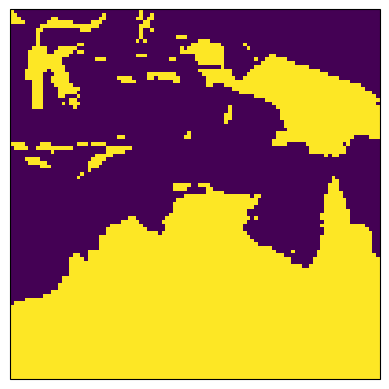

In [10]:
iris.plot.pcolormesh(mask_cube_era[1])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


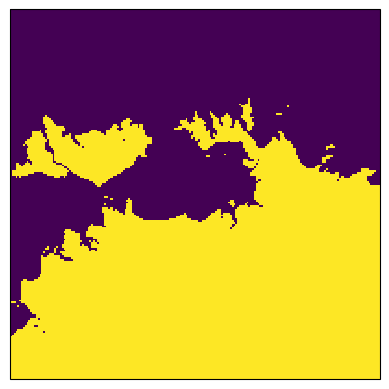

In [11]:
iris.plot.pcolormesh(mask_cube_d0198[1])

In [12]:
# Convert these masks to data arrays
laf_era = xr.DataArray.from_iris(mask_cube_era[0])
lbm_era = xr.DataArray.from_iris(mask_cube_era[1])

laf_d0198 = xr.DataArray.from_iris(mask_cube_d0198[0])
lbm_d0198 = xr.DataArray.from_iris(mask_cube_d0198[1])

# Load orography
ERA_OROG_FILE = ERA_DIR / 'qrparm.orog.mn'
D0198_OROG_FILE = D0198_DIR / 'qrparm.orog.mn'

era_orog_cube = ants.load(ERA_OROG_FILE)
d0198_orog_cube = ants.load(D0198_OROG_FILE)

orog_era = xr.DataArray.from_iris(era_orog_cube[0])
orog_d0198 = xr.DataArray.from_iris(d0198_orog_cube[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


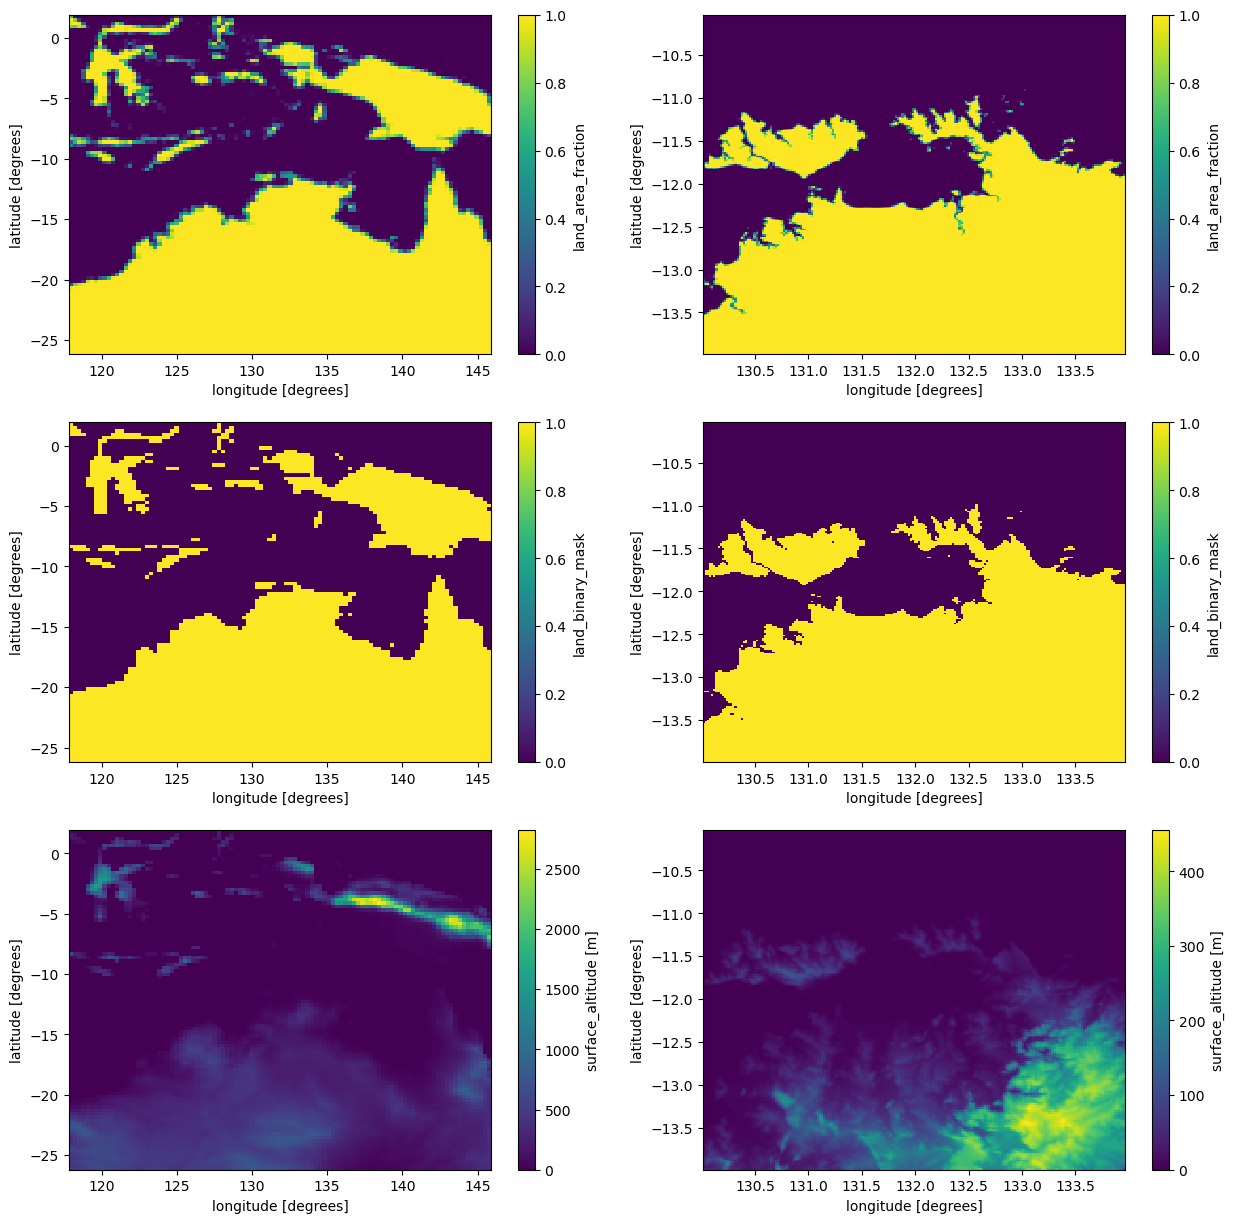

In [13]:
fig,ax=plt.subplots(3,2,figsize=(15,15))#,subplot_kw={'projection':ccrs.PlateCarree()})

laf_era.plot(ax=ax[0,0])
lbm_era.plot(ax=ax[1,0])
orog_era.plot(ax=ax[2,0])

laf_d0198.plot(ax=ax[0,1])
lbm_d0198.plot(ax=ax[1,1])
orog_d0198.plot(ax=ax[2,1])


#axes_pretty(ax.flatten())

In [14]:
# Quick logic to check all ancil files.
files = list(ERA_DIR.glob('qrparm*'))

In [15]:
# Get total list of fields
num_plots = 0
for file in files:
    #print (f'INFO : Loading {file}')
    try:
        cube = ants.load(file)
        #print (cube)
        num_plots = num_plots+len(cube)
    except:
        print (f'ERROR : Unable to open {file}\nERROR : You will have to manually check this file using "xconv" ')
        continue

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1471: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t1 = cftime.datetime(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1504: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t2 = cftime.datetime(


ERROR : Unable to open /home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/era5/qrparm.veg.dist
ERROR : You will have to manually check this file using "xconv" 


In [16]:
num_plots

64

In [17]:
def collapse_cube(file,cube):
    """
    Collapse a cube onto lat/lon dimensions via averaging
    """
    collapse_dims = []
    
    for coord in cube.coords():
        if coord not in cube.dim_coords:
            collapse_dims.append(coord.name())
            print (f'For {file.name} {cube.name()} coordinate {coord.name()} will be collapsed')
            
    # Check if time remains
    if 'time' in [ c.name() for c in cube.dim_coords ]: 
        collapse_dims.append('time')
        print (f'For {file.name} variable {cube.name()} coordinate time will be collapsed')
    new_cube = cube.collapsed(collapse_dims,iris.analysis.MEAN)

    return new_cube

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

For qrparm.veg.func_igbp canopy_height coordinate pseudo_level will be collapsed
For qrparm.veg.func_igbp canopy_height coordinate month will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'month_number', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'month_number'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.func_igbp leaf_area_index coordinate pseudo_level will be collapsed
For qrparm.veg.func_igbp leaf_area_index coordinate month will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'month_number', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'month_number'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster fi

For qrparm.veg.func canopy_height coordinate pseudo_level will be collapsed
For qrparm.veg.func variable canopy_height coordinate time will be collapsed
For qrparm.veg.func leaf_area_index coordinate pseudo_level will be collapsed
For qrparm.veg.func variable leaf_area_index coordinate time will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous boun

ERROR : Unable to open /home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/era5/qrparm.veg.dist
For qrparm.veg.frac m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/publ

For qrparm.veg.frac.urb2t m01s00i216 coordinate pseudo_level will be collapsed
For qrparm.veg.frac_igbp m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may no

For qrparm.veg.frac_cci_pre_c4 m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.frac_cci m01s00i216 coordinate pseudo_level will be collapsed


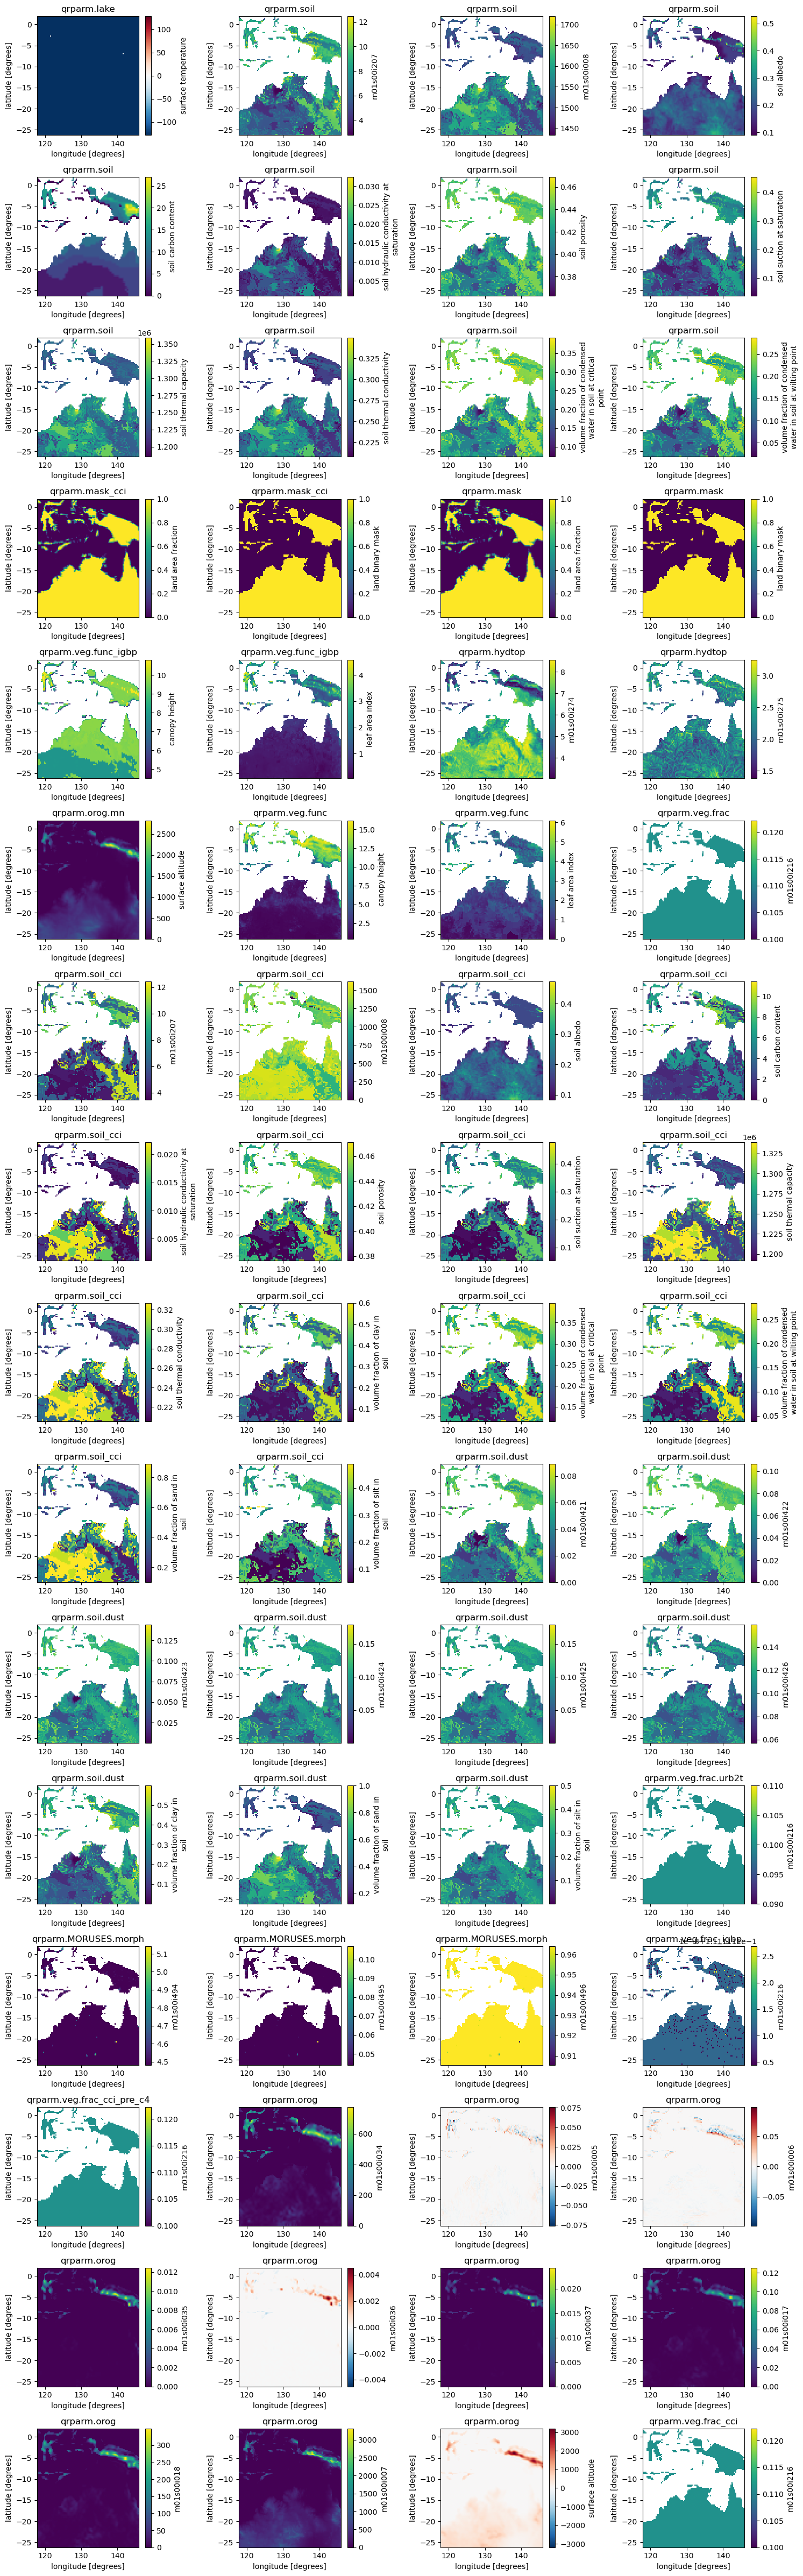

In [18]:
num_columns=4
num_rows = num_plots // num_columns

if num_plots % num_columns != 0:
    num_rows += 1

Position = range(1,num_plots+1)

fig_height = num_rows*3
fig_width = 15
max_label_length=30

fig = plt.figure(figsize=(fig_width,fig_height))
k = 0
for file in files:
    try:
        cubes = ants.load(file)
    except:
        print (f'ERROR : Unable to open {file}')
        continue

    # Loop over all variables in cube
    for cube in cubes:
        ax = fig.add_subplot(num_rows, num_columns, Position[k])

        if len(cube.shape) > 2: 
            # Need to reduce dimension
            cube = collapse_cube(file,cube)
            
        da = xr.DataArray.from_iris(cube)
        if 'standard_name' in da.attrs.keys():
            split = textwrap.wrap(da.attrs['standard_name'].replace('_',' '),max_label_length)
            label = '\n'.join(split)
            cb_args = {'label': label}
        else:
            cb_args = {'label':da.attrs['STASH']}

        da.plot(ax=ax,cbar_kwargs=cb_args)
        ax.set_title(file.name)
        k += 1
plt.tight_layout()

In [19]:
'time' in [ c.name() for c in cube.dim_coords ]

False

In [20]:
# Repeat for higher-resolution domain
files = list(D0198_DIR.glob('qrparm*'))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

ERROR : Unable to open /home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/d0198/qrparm.veg.dist


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

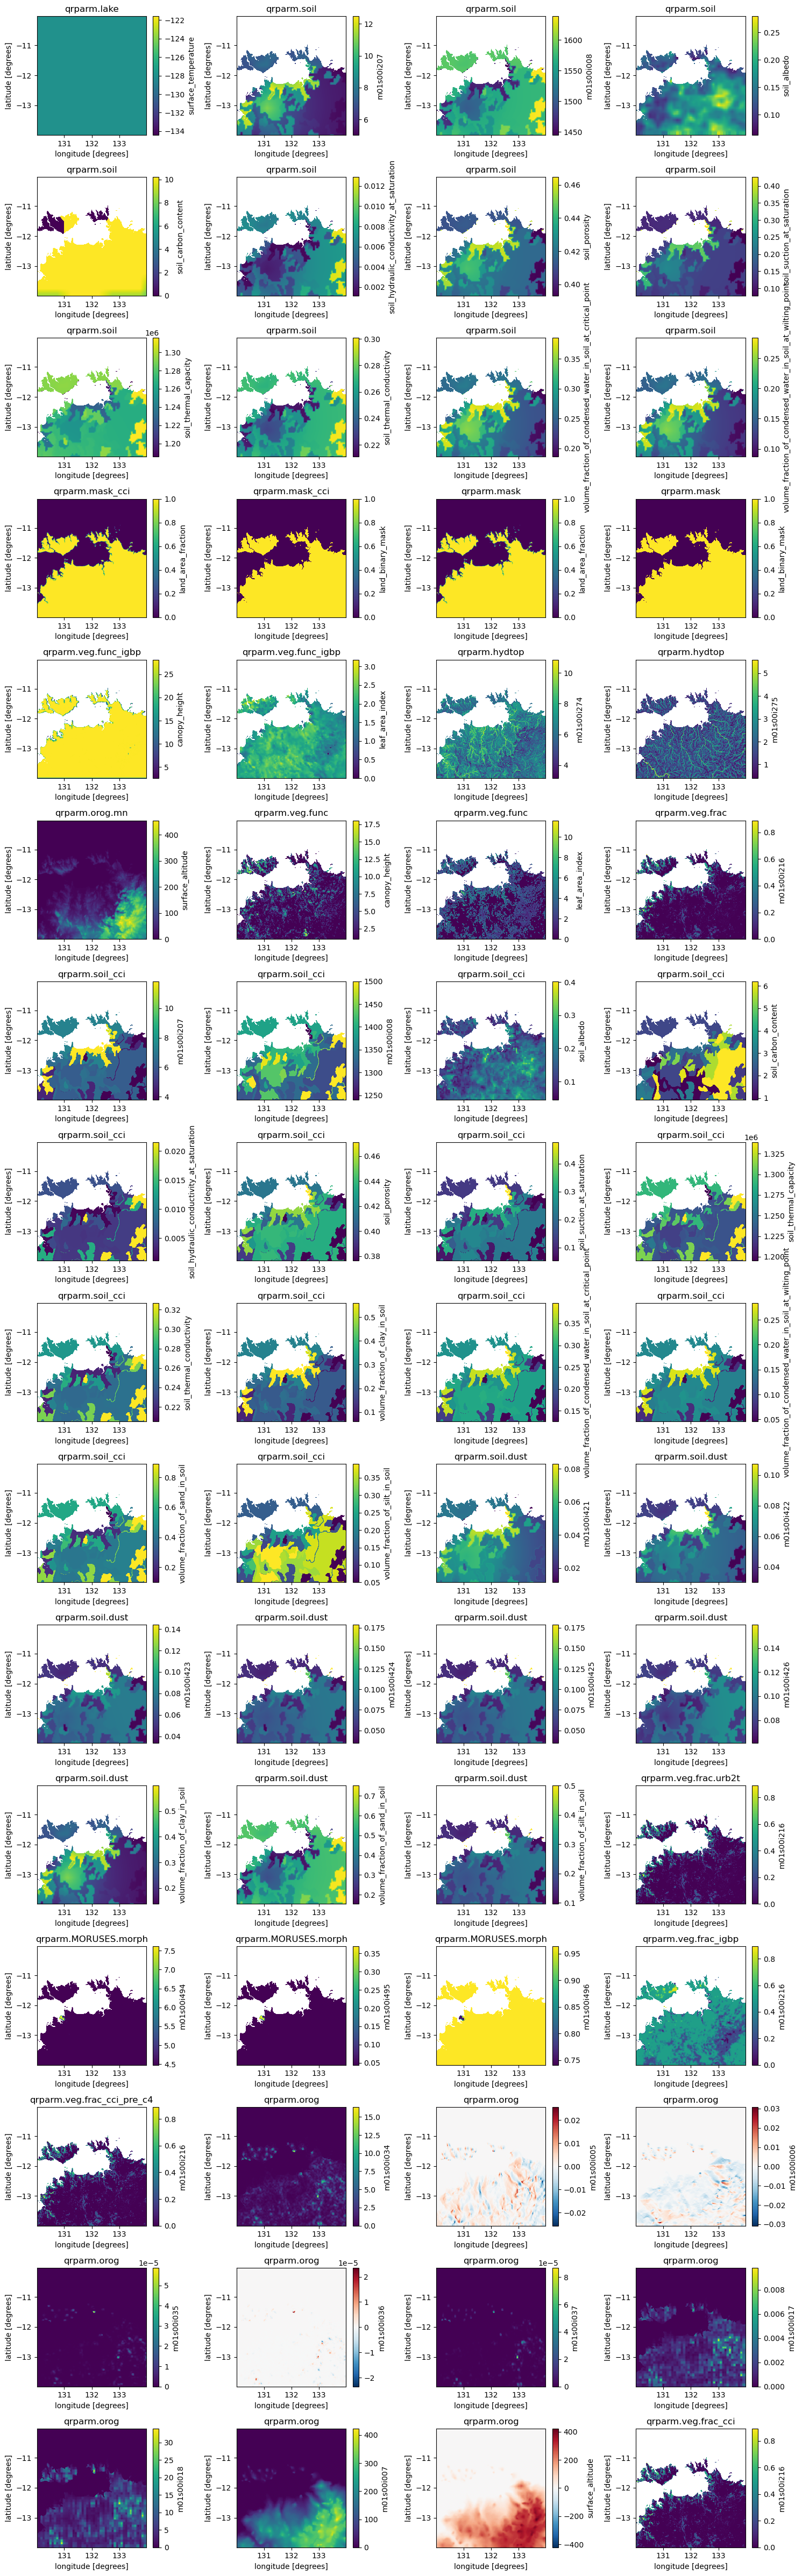

In [21]:
fig = plt.figure(figsize=(fig_width,fig_height))
k = 0
for file in files:
    try:
        cubes = ants.load(file)
    except:
        print (f'ERROR : Unable to open {file}')
        continue

    # Loop over all variables in cube
    for cube in cubes:
        ax = fig.add_subplot(num_rows, num_columns, Position[k])
        da = xr.DataArray.from_iris(cube)
        if 'standard_name' in da.attrs.keys():
            cb_args = {'label':da.attrs['standard_name']}
        else:
            cb_args = {'label':da.attrs['STASH']}
        if len(da.dims) > 2: 
            # Need to reduce dimension
            if len(da.dims) == 3:
                da = da[0]
            elif len(da.dims) == 4:
                da = da[0,0]

        da.plot(ax=ax,cbar_kwargs=cb_args)
        ax.set_title(file.name)
        k += 1
plt.tight_layout()

In [22]:
file

PosixPath('/home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/d0198/qrparm.veg.frac_cci')

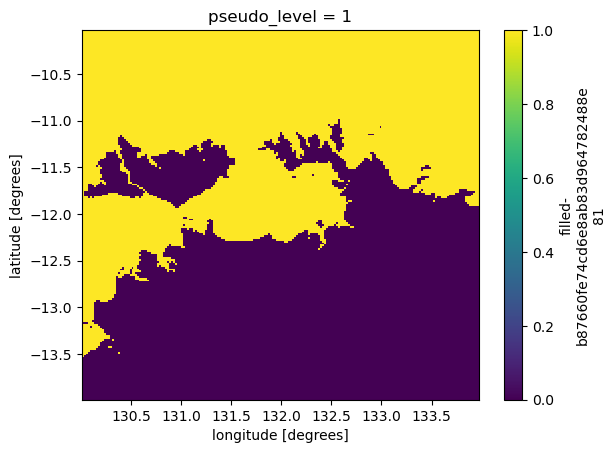

In [23]:
np.isnan(da).plot()

In [24]:
cube.coords()[0].units

Unit('degrees')

In [25]:
cube.dim_coords

(<DimCoord: latitude / (degrees)  [-13.98, -13.96, ..., -10.06, -10.04]  shape(200,)>,
 <DimCoord: longitude / (degrees)  [130.02, 130.04, ..., 133.94, 133.96]  shape(200,)>)

In [26]:
cube.coords()

[<DimCoord: latitude / (degrees)  [-13.98, -13.96, ..., -10.06, -10.04]  shape(200,)>,
 <DimCoord: longitude / (degrees)  [130.02, 130.04, ..., 133.94, 133.96]  shape(200,)>,
 <DimCoord: pseudo_level / (1)  [1, 2, ..., 8, 9]  shape(9,)>]

In [27]:
for coord in cube.coords():
    if coord not in cube.dim_coords:
        print (f'{coord.name()} is not lat/lon')

pseudo_level is not lat/lon


In [28]:
cube.collapsed([coord.name()],iris.analysis.MEAN)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


<iris 'Cube' of m01s00i216 / (unknown) (latitude: 200; longitude: 200)>

In [29]:
da.attrs

{'STASH': STASH(model=1, section=0, item=216), 'grid_staggering': 6}

In [30]:
import textwrap
import re

In [31]:
text='Cannot_check_if_coordinate_is_contiguous:_Invalid_operation_for pseudo_level, with 0 bound(s)'

In [32]:
textwrap.shorten(text.replace('_',' '),60,placeholder=' ..')

'Cannot check if coordinate is contiguous: Invalid ..'

In [33]:
label=textwrap.wrap(text.replace('_',' '),20)

In [34]:
'\n'.join(label)

'Cannot check if\ncoordinate is\ncontiguous: Invalid\noperation for pseudo\nlevel, with 0\nbound(s)'

In [35]:
files = list(D0198_DIR.glob('qrparm*'))
print (f'All files = {len(files)}')

All files = 18


In [37]:
files = list(D0198_DIR.glob('qrparm*'))
print (f'All files = {len(files)}')

All files = 18


In [38]:
for file in files:
    if file.is_symlink():
        print (file)

/home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/d0198/qrparm.mask
/home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/d0198/qrparm.orog.mn
/home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/d0198/qrparm.veg.frac
